In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
path = "NCprojectionsbyagegrp2019 - NCprojectionsbyagegrp2019.csv"

# Read in NC census data
nc_df = pd.read_csv(path)

# Display the data table for preview
nc_df.head()


,county,year,race,sex,total
0,Alamance,2000,aian,female,274
1,Alexander,2000,aian,female,18
2,Alleghany,2000,aian,female,10
3,Anson,2000,aian,female,41
4,Ashe,2000,aian,female,27


In [2]:
# Get list of years and total state population

years = nc_df['year'].unique().tolist()

total_df = nc_df[(nc_df['race'] == 'Total') & (nc_df['sex'] == 'Total') & (nc_df['county'] == 'State')]
total_pop = total_df['total']


In [3]:
# Clean NC data, only keep state-level data, no county breakdown

nc_df = nc_df[nc_df['county'] == 'State']
# nc_df = nc_df.groupby(['year','sex','race']).sum()
#nc_df.reset_index()
nc_df.head()


,county,year,race,sex,total
68100,State,2000,Total,Total,8081986
68201,State,2001,Total,Total,8209775
68302,State,2002,Total,Total,8324058
68403,State,2003,Total,Total,8418493
68504,State,2004,Total,Total,8542420


In [4]:
# Get pop values for different demographcis

nh_white_female = nc_df[(nc_df['race'] == 'white') & (nc_df['sex'] == 'female')]['total'].tolist()
nh_white_male = nc_df[(nc_df['race'] == 'white') & (nc_df['sex'] == 'male')]['total'].tolist()
nh_black_female = nc_df[(nc_df['race'] == 'black') & (nc_df['sex'] == 'female')]['total'].tolist()
nh_black_male = nc_df[(nc_df['race'] == 'black') & (nc_df['sex'] == 'male')]['total'].tolist()
asian_female = nc_df[(nc_df['race'] == 'asian') & (nc_df['sex'] == 'female')]['total'].tolist()
asian_male = nc_df[(nc_df['race'] == 'asian') & (nc_df['sex'] == 'male')]['total'].tolist()


# Make dataframe
demographic_data = pd.DataFrame({
    'White Women': nh_white_female,
    'White Men': nh_white_male,
    'Black Women': nh_black_female,
    'Black Men': nh_black_male,
    'Asian Women': asian_female,
    'Asian Men': asian_male
   }, index=years)

demographic_data.head()

,White Women,White Men,Black Women,Black Men,Asian Women,Asian Men
2000,3034423,2985522,932696,829569,63804,60942
2001,3076835,3022754,947445,842132,68685,65224
2002,3113986,3052829,961656,854761,73236,69243
2003,3150611,3069805,975065,861269,78222,73415
2004,3184695,3108496,988455,875586,82918,78113


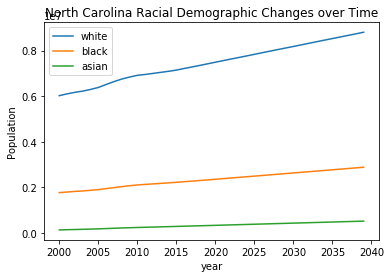

In [5]:
# Plot race over time

white = []
black = []
asian = []

for i in range(len(years)):
    white.append(nh_white_female[i] + nh_white_male[i])
    black.append(nh_black_female[i] + nh_black_male[i])
    asian.append(asian_female[i] + asian_male[i])


labels = ['white','black','asian']
plt.plot(years,white)
plt.plot(years,black)
plt.plot(years,asian)
plt.legend(labels)
plt.title('North Carolina Racial Demographic Changes over Time')
plt.ylabel('Population')
plt.xlabel('year')
plt.show()

# demographic_data.head()

In [6]:
# Read in voter data and display
# 2016 voter breakdown by political party. Based on CNN exit polls

voter_path = "voter_breakdown_2016 - north_carolina.csv"

race_voter = pd.read_csv(voter_path)
race_voter = race_voter.groupby(['race','gender']).sum()
race_voter

clinton  trump
race   gender                
black  men          82     14
       women        95      3
latino men          63     32
       women        69     28
others men          57     39
       women        57     39
white  men          27     68
       women        37     60

In [7]:
from turnout import turnout

turnout


voting_rate
race     gender             
asian    female         33.6
         male           34.2
black    female         60.4
         male           50.5
hispanic female         35.1
         male           29.9
nh_white female         65.6
         male           62.5

In [8]:
demographic_data.head()

,White Women,White Men,Black Women,Black Men,Asian Women,Asian Men
2000,3034423,2985522,932696,829569,63804,60942
2001,3076835,3022754,947445,842132,68685,65224
2002,3113986,3052829,961656,854761,73236,69243
2003,3150611,3069805,975065,861269,78222,73415
2004,3184695,3108496,988455,875586,82918,78113


In [9]:
rep_breakdown = race_voter['trump'] / 100
rate = turnout['voting_rate'] / 100

rep_white_female = demographic_data['White Women'] * rate[6] * rep_breakdown[7]
rep_white_male = demographic_data['White Men'] * rate[7] * rep_breakdown[6]
rep_black_female = demographic_data['Black Women'] * rate[2] * rep_breakdown[1]
rep_black_male = demographic_data['Black Men'] * rate[3] * rep_breakdown[0]
rep_asian_female = demographic_data['Asian Women'] * rate[0] * rep_breakdown[5]
rep_asian_male = demographic_data['Asian Men'] * rate[1] * rep_breakdown[4]

rep_total = rep_white_female + rep_black_female + rep_asian_female + rep_white_male + rep_black_male + rep_asian_male

rep_forecast_df = pd.DataFrame({
    'White Women': rep_white_female,
    'White Men': rep_white_male,
    'Black Women': rep_black_female,
    'Black Men': rep_black_male,
    'Asian Women': rep_asian_female,
    'Asian Men': rep_asian_male
   }, index=years)

rep_forecast_df.head()

,White Women,White Men,Black Women,Black Men,Asian Women,Asian Men
2000,1.194349e+06,1268846.850,16900.45152,58650.5283,8360.87616,8128.44396
2001,1.211042e+06,1284670.450,17167.70340,59538.7324,9000.48240,8699.57712
2002,1.225665e+06,1297452.325,17425.20672,60431.6027,9596.84544,9235.63134
2003,1.240080e+06,1304667.125,17668.17780,60891.7183,10250.21088,9792.09270
2004,1.253496e+06,1321110.800,17910.80460,61903.9302,10865.57472,10418.71194


In [10]:
dem_breakdown = race_voter['clinton'] / 100

dem_white_female = demographic_data['White Women'] * rate[6] * dem_breakdown[7]
dem_white_male = demographic_data['White Men'] * rate[7] * dem_breakdown[6]
dem_black_female = demographic_data['Black Women'] * rate[2] * dem_breakdown[1]
dem_black_male = demographic_data['Black Men'] * rate[3] * dem_breakdown[0]
dem_asian_female = demographic_data['Asian Women'] * rate[0] * dem_breakdown[5]
dem_asian_male = demographic_data['Asian Men'] * rate[1] * dem_breakdown[4]

dem_total = dem_white_female + dem_black_female + dem_asian_female + dem_white_male + dem_black_male + dem_asian_male

dem_forecast_df = pd.DataFrame({
    'White Women': dem_white_female,
    'White Men': dem_white_male,
    'Black Women': dem_black_female,
    'Black Men': dem_black_male,
    'Asian Women': dem_asian_female,
    'Asian Men': dem_asian_male
   }, index=years)

dem_forecast_df.head()

,White Women,White Men,Black Women,Black Men,Asian Women,Asian Men
2000,736515.15056,503806.83750,535180.9648,343524.5229,12219.74208,11880.03348
2001,746809.39120,510089.73750,543643.9410,348726.8612,13154.55120,12714.76656
2002,755826.68192,515164.89375,551798.2128,353956.5301,14026.15872,13498.23042
2003,764716.30192,518029.59375,559492.2970,356651.4929,14981.07744,14311.52010
2004,772989.17040,524558.70000,567175.4790,362580.1626,15880.45536,15227.34822


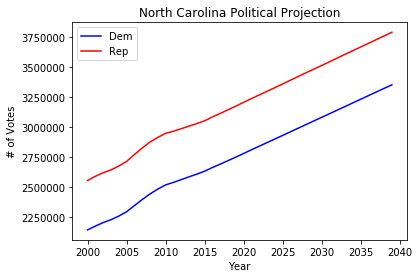

In [11]:
forecast_df = pd.DataFrame({
   'Dem': dem_total,
   'Rep': rep_total
   }, index=years)

forecast_df.head()

plt.plot(years,dem_total, label = "Dem", color = 'b')
plt.plot(years,rep_total, label = "Rep", color = 'r')
plt.ylabel('# of Votes')
plt.xlabel('Year')
plt.title('North Carolina Political Projection')
plt.legend(loc='best')
plt.show()

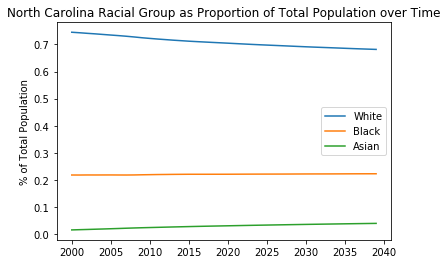

,White,Black,Asian
2000,0.744860,0.218049,0.015435
2001,0.742967,0.217981,0.016311
2002,0.740842,0.218213,0.017117
2003,0.738899,0.218131,0.018012
2004,0.736699,0.218210,0.018851


In [12]:
# Same racial demographics as above, but as % of total population, instead of population totals. 

# demographic_data_percent = total_df

white_percent = (white/total_pop).tolist()
black_percent = (black/total_pop).tolist()
asian_percent = (asian/total_pop).tolist()


demographic_data_percent = pd.DataFrame({
    'White': white_percent,
    'Black': black_percent,
    'Asian': asian_percent
   }, index=years)


demographic_data_percent.plot(title = 'North Carolina Racial Group as Proportion of Total Population over Time')
plt.ylabel('% of Total Population')
plt.show()

demographic_data_percent.head()